Questions/ideas:
- how to easily/efficiently get diffs?
- Amendment vs issue date?
- See which titles have most activity per size of current doc
	- substantive
	- removals
	- Could use vectorized names to summarize where most of the changes are happening in a given period. 

In [4]:
import pandas as pd
import json
from scripts.download_versions import RAW_VERSIONS_PATH

Error processing file title_35_changes.json: 'issue_date'


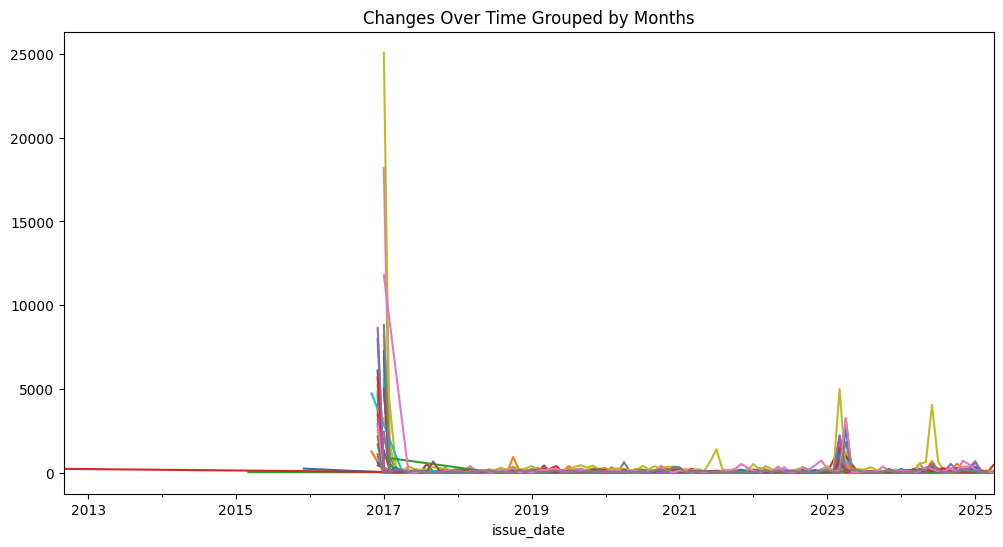

In [43]:
# Load the JSON file into a dictionary

for i in range(1, 50):
	try:
		with open(RAW_VERSIONS_PATH / f"title_{i}_changes.json", "r") as file:
			data = json.load(file)

		# Convert the dictionary to a DataFrame
		df = pd.DataFrame(data['content_versions'])
		df.shape
		# df.head()
		# Convert 'issue_date' to datetime
		df['issue_date'] = pd.to_datetime(df['issue_date'])

		# Group by month and count changes
		monthly_changes = df.groupby(df['issue_date'].dt.to_period('M')).size()

		# Plot the changes
		monthly_changes.plot(kind='line', figsize=(12, 6), title='Changes Over Time Grouped by Months')
	except Exception as e:
		print(f"Error processing file title_{i}_changes.json: {e}")
		continue